In [38]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

# Path to the CIFAR-100 folder
folder_path = './data/cifar-100-python/'  # Replace this with your folder path

# Load CIFAR-100 images
def load_cifar100_images(folder_path,superclass,fineclass):
    images = []
    for superclassname in os.listdir(folder_path):
        if superclassname == superclass:
            for classname in os.listdir(os.path.join(folder_path, superclassname)):
                if classname == fineclass:
                    for filename in os.listdir(os.path.join(folder_path, superclassname, classname)):
                        if filename.endswith('.png'):  # Assuming images are stored as PNG
                            image_path = os.path.join(folder_path, superclassname, classname, filename)
                            with Image.open(image_path) as img:
                                images.append(img.copy())
    return images

# Load images from your folder
folder_path = r'C:\Users\Martin\Documents\School\Thesis\cifar100\train'

superclasses = ["large_omnivores_and_herbivores","household_furniture"]
classes = [["camel","cattle","elephant","chimpanzee","kangaroo"],["bed","couch","chair","table","wardrobe"]]

images = []

for index_superclass,superclass in enumerate(superclasses):
    for index_class,classname in enumerate(classes[index_superclass]):
        images.append(load_cifar100_images(folder_path,superclass,classname))

# Select 100 random images
random_images = [[] for _ in range(10)]
for i in range(10):
    random_images[i] = random.sample(images[i], 10)


In [14]:
#images = load_cifar100_images(r'C:\Users\Martin\Documents\School\Thesis\cifar100\train',"large_omnivores_and_herbivores", "camel")

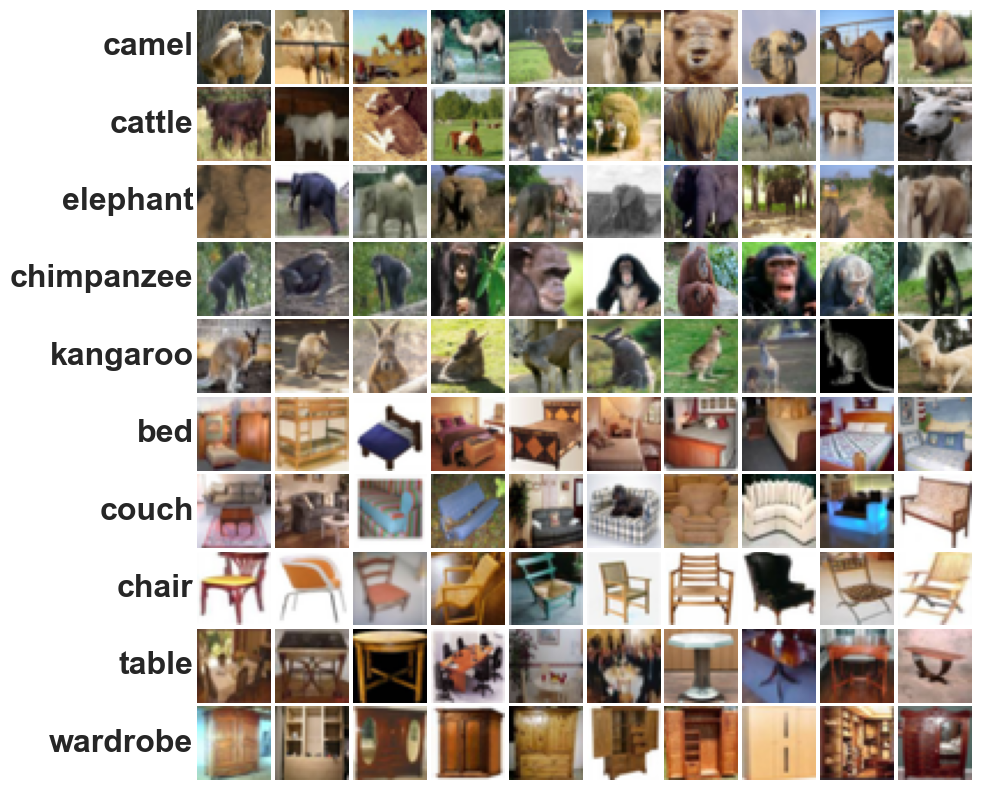

In [62]:
flattened_images = [image for row in random_images for image in row]

classes = [["camel", "cattle", "elephant", "chimpanzee", "kangaroo"],
           ["bed", "couch", "chair", "table", "wardrobe"]]

fig, axes = plt.subplots(10, 10, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(flattened_images[i])
    ax.axis('off')

    row = i // 10
    col = i % 10

    # Add label to the last image in each row (rightmost column)
    if col == 0:
        if row < 5:
            label = classes[0][row]
        else:
            label = classes[1][row - 5]
        
        # Add the label to the right of the image
        ax.text(-0.05, 0.5, label, transform=ax.transAxes,
                fontsize=23, va='center', ha='right',fontweight='bold')
        
#plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.05)

plt.savefig("cifar100_grid.png", dpi=300, bbox_inches='tight')
plt.savefig("cifar100_grid.pdf", dpi=300, bbox_inches='tight')
plt.show()